In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('clean_data.csv')
df.head()

,Unnamed: 0,ID,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,Time_taken (min),approx_distance_km,travel_time,distance_km
0,0,0xcdcd,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,3.0,4.0,2,3.0,0.0,3.0,46,10.988439,28.450000,16.8077
1,1,0xd987,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,5.0,3.0,1,1.0,0.0,3.0,23,6.279108,13.115000,8.8577
2,2,0x2784,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,4.0,2.0,1,1.0,0.0,3.0,21,14.127993,18.655000,21.3843
3,3,0xc8b6,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,4.0,1.0,0,0.0,0.0,3.0,20,3.139554,8.308333,4.8283
4,4,0xdb64,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,3.0,4.0,1,1.0,0.0,3.0,41,20.407102,24.350000,23.4788


In [3]:
df.shape

(37909, 19)

In [4]:
df.isnull().sum()

Unnamed: 0                     0
ID                             0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
approx_distance_km             0
travel_time                    3
distance_km                    3
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [7]:
features = ['Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries', 'Festival', 'City', 'distance_km']
print(features)

['Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries', 'Festival', 'City', 'distance_km']


In [8]:
f = ['Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)', 'distance_km']
df = df[f]
df.head()

,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,Time_taken (min),distance_km
0,3.0,4.0,2,3.0,0.0,3.0,46,16.8077
1,5.0,3.0,1,1.0,0.0,3.0,23,8.8577
2,4.0,2.0,1,1.0,0.0,3.0,21,21.3843
3,4.0,1.0,0,0.0,0.0,3.0,20,4.8283
4,3.0,4.0,1,1.0,0.0,3.0,41,23.4788


In [9]:
n_samples = 45000
n_samples1 = 25000

np.random.seed(42)

synthetic_data = {
    
    'Weather_conditions': np.random.randint(1, 6, n_samples).astype(float),  
    'Road_traffic_density': np.random.randint(1, 5, n_samples).astype(float),
    'Vehicle_condition': np.random.randint(0, 3, n_samples),
    'multiple_deliveries': np.random.randint(0, 4, n_samples).astype(float),
    'Festival': np.random.randint(0, 2, n_samples).astype(float),
    'City': np.random.randint(1, 4, n_samples).astype(float),
    'Time_taken (min)': np.random.uniform(2, 10, n_samples),
    'distance_km': np.random.uniform(0.0, 1.6, n_samples)
}

synthetic_data1 = {
    
    'Weather_conditions': np.random.randint(1, 6, n_samples1).astype(float),  
    'Road_traffic_density': np.random.randint(1, 5, n_samples1).astype(float),
    'Vehicle_condition': np.random.randint(0, 3, n_samples1),
    'multiple_deliveries': np.random.randint(0, 4, n_samples1).astype(float),
    'Festival': np.random.randint(0, 2, n_samples1).astype(float),
    'City': np.random.randint(1, 4, n_samples1).astype(float),
    'Time_taken (min)': 0,
    'distance_km': 0
}

synthetic_df = pd.DataFrame(synthetic_data)
synthetic_df.head()

synthetic_df1 = pd.DataFrame(synthetic_data1)
synthetic_df1.head()

,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,Time_taken (min),distance_km
0,1.0,1.0,2,3.0,1.0,3.0,0,0
1,2.0,2.0,0,1.0,0.0,3.0,0,0
2,4.0,3.0,2,0.0,0.0,3.0,0,0
3,4.0,1.0,2,3.0,1.0,1.0,0,0
4,4.0,2.0,0,2.0,1.0,3.0,0,0


In [10]:
combined_df = pd.concat([df, synthetic_df, synthetic_df1], ignore_index=True)
combined_df.head()

,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,Time_taken (min),distance_km
0,3.0,4.0,2,3.0,0.0,3.0,46.0,16.8077
1,5.0,3.0,1,1.0,0.0,3.0,23.0,8.8577
2,4.0,2.0,1,1.0,0.0,3.0,21.0,21.3843
3,4.0,1.0,0,0.0,0.0,3.0,20.0,4.8283
4,3.0,4.0,1,1.0,0.0,3.0,41.0,23.4788


In [11]:
X = combined_df[features]
X.head()

,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,distance_km
0,3.0,4.0,2,3.0,0.0,3.0,16.8077
1,5.0,3.0,1,1.0,0.0,3.0,8.8577
2,4.0,2.0,1,1.0,0.0,3.0,21.3843
3,4.0,1.0,0,0.0,0.0,3.0,4.8283
4,3.0,4.0,1,1.0,0.0,3.0,23.4788


In [12]:
y = combined_df['Time_taken (min)']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

LightGBM

In [14]:
import lightgbm as lgb

params = {
    'n_estimators': 351,
    'learning_rate': 0.020468063165234227,
    'max_depth': 9,
    'num_leaves': 60,
    'min_child_samples': 47,
    'subsample': 0.6284384317237434,
    'colsample_bytree': 0.7896582974323323,
    'reg_alpha': 0.0019326774481699123,
    'reg_lambda': 0.05070012546687946,
    'random_state': 42
}

model = lgb.LGBMRegressor(**params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 80929, number of used features: 7
[LightGBM] [Info] Start training from score 11.828794


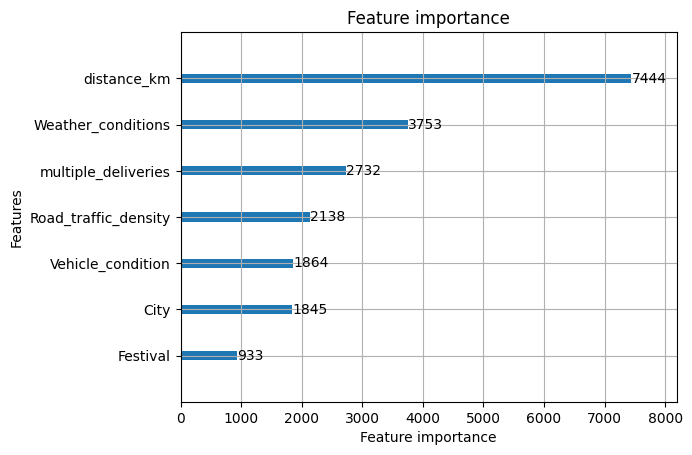

In [15]:
import matplotlib.pyplot as plt

lgb.plot_importance(model)
plt.show()

Best MAE params: {'n_estimators': 351, 'learning_rate': 0.020468063165234227, 'max_depth': 9, 'num_leaves': 60, 'min_child_samples': 47, 'subsample': 0.6284384317237434, 'colsample_bytree': 0.7896582974323323, 'reg_alpha': 0.0019326774481699123, 'reg_lambda': 0.05070012546687946}
Best MAE score: 4.903850914161457

In [16]:
mae = mean_absolute_error(y_pred, y_test)
print(mae)

2.627008352094015


In [17]:
errors = np.abs(y_test - y_pred)

In [18]:
error_df = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred,
    'abs_error': errors
})

worst_preds = error_df.sort_values(by='abs_error', ascending=False).head()
print(worst_preds)

          y_true     y_pred  abs_error
16775  42.000000  11.439731  30.560269
20555  54.000000  25.445908  28.554092
29111  46.000000  18.099953  27.900047
48340   3.896266  28.401997  24.505731
34510  51.000000  27.016256  23.983744


In [19]:
tolerance = mae
correct_within_range = np.abs(y_pred - y_test) <= tolerance
custom_accuracy = np.mean(correct_within_range)
print(f"Custom Accuracy (±{tolerance}): {custom_accuracy * 100:.2f}%")

Custom Accuracy (±2.627008352094015): 62.38%


In [20]:
import joblib

joblib.dump(model, 'model1.joblib')

['model1.joblib']

In [21]:
print("Distance column summary:")
print(X_train['distance_km'].describe())

Distance column summary:
count    80929.000000
mean         5.221299
std          8.080019
min          0.000000
25%          0.071021
50%          1.032976
75%          8.227600
max         68.460100
Name: distance_km, dtype: float64


In [22]:
print("NaNs in y_test:", np.isnan(y_test).sum())
print("NaNs in y_pred:", np.isnan(y_pred).sum())

NaNs in y_test: 0
NaNs in y_pred: 0
